## eCommerce
### Brazilian-Ecommerce


### Link
https://www.kaggle.com/olistbr/brazilian-ecommerce

### Questões a serem respondidas:

- Existe diferença do ticket médio por região ?
- Existe diferença de gastos por segmento de cliente ?
- Como o tempo de entrega afeta a satisfação do cliente ?

# Importando Módulos / Download Dados

In [1]:
#!pip install numpy matplotlib pandas mlxtend kaggle seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
import kaggle
import os

In [2]:
# Definição Funções
def download_Kaggle(fName, pathFile):
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files(fName, path=pathFile, unzip=True)


def get_DF_to_File(kaggleFile):
    dirname = os.path.abspath('')
    arquivo=dirname + '/../datasets/'+kaggleFile
    return arquivo


# Variáveis Definição
dataset = 'olistbr/brazilian-ecommerce'
dataset_root = '../datasets'

order_payments = 'olist_order_payments_dataset.csv'
order = 'olist_orders_dataset.csv'
order_review = 'olist_order_reviews_dataset.csv'
customer = 'olist_customers_dataset.csv'

download_Kaggle(dataset,dataset_root)

# Load Dataframes

In [3]:
op_rv=pd.read_csv(get_DF_to_File(order_review), index_col='order_id',sep=',')
op_df=pd.read_csv(get_DF_to_File(order_payments), index_col='order_id',sep=',')
op_df.head(10)

,payment_sequential,payment_type,payment_installments,payment_value
order_id,,,,
b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09


In [4]:
cust_df = pd.read_csv(get_DF_to_File(customer),sep=',')
cust_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
ord_df=pd.read_csv(get_DF_to_File(order), index_col='order_id', parse_dates=['order_approved_at','order_purchase_timestamp'],sep=',')
ord_df.head(150)

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_id,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...
e7a65190baa4e6fd192246157c0b81fb,7d986867cfcd083f25ad4f692bd2df06,delivered,2017-04-26 16:14:11,2017-04-27 17:22:58,2017-04-28 12:43:07,2017-05-12 14:04:02,2017-05-29 00:00:00
62a12e4d2a742b2491d7c00d2d79bf52,b60550c21000f91484c7d2aa2b8c522e,delivered,2017-11-27 19:24:52,2017-11-27 19:39:02,2017-11-28 22:58:14,2017-12-08 15:41:46,2017-12-27 00:00:00
90349f264a3d6a2525a34598d09dda6b,d19f254a07da73a055409256e9bfe40a,delivered,2018-05-11 16:35:19,2018-05-12 03:32:26,2018-05-14 15:16:00,2018-05-15 18:38:39,2018-05-21 00:00:00


# Análise Exploratória

In [6]:
df = op_df.join(ord_df).join(op_rv)

df['payment_value'] = df['payment_value'].astype('float64')
df['year'] = [d.year for d in df.order_purchase_timestamp]
#df['date'] = pd.to_datetime(df['order_purchase_timestamp'], dayfirst=True, unit='s')

df.head()

,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,year
order_id,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,2017
00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,2017
000229ec398224ef6ca0657da4fc703e,1,credit_card,5,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,2018
00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,2018
00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,2017


In [7]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104477 entries, 00010242fe8c5a6d1ba2dd792cb16214 to fffe41c64501cc87c801fd61db3f6244
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   payment_sequential             104477 non-null  int64         
 1   payment_type                   104477 non-null  object        
 2   payment_installments           104477 non-null  int64         
 3   payment_value                  104477 non-null  float64       
 4   customer_id                    104477 non-null  object        
 5   order_status                   104477 non-null  object        
 6   order_purchase_timestamp       104477 non-null  datetime64[ns]
 7   order_approved_at              104301 non-null  datetime64[ns]
 8   order_delivered_carrier_date   102579 non-null  object        
 9   order_delivered_customer_date  101323 non-null  object        
 10  order_estimated_

In [8]:
# Verificando valores nulos
df.isnull().sum().sort_values(ascending=False)

review_comment_title             92481
review_comment_message           61662
order_delivered_customer_date     3154
order_delivered_carrier_date      1898
review_answer_timestamp            800
review_creation_date               800
review_score                       800
review_id                          800
order_approved_at                  176
order_estimated_delivery_date        0
payment_sequential                   0
payment_type                         0
order_purchase_timestamp             0
order_status                         0
customer_id                          0
payment_value                        0
payment_installments                 0
year                                 0
dtype: int64

In [9]:
# Variáveis numéricas.
df.describe()

,payment_sequential,payment_installments,payment_value,review_score,year
count,104477.000000,104477.000000,104477.000000,103677.000000,104477.000000
mean,1.093379,2.856418,153.923071,4.083886,2017.534950
std,0.709289,2.690075,217.120187,1.349185,0.505413
min,1.000000,0.000000,0.000000,1.000000,2016.000000
25%,1.000000,1.000000,56.780000,4.000000,2017.000000
50%,1.000000,1.000000,100.000000,5.000000,2018.000000
75%,1.000000,4.000000,171.690000,5.000000,2018.000000
max,29.000000,24.000000,13664.080000,5.000000,2018.000000


In [10]:
# Número de payment_type por order_status.
# 
pd.crosstab(df['payment_type'],df['order_status'])

order_status,approved,canceled,created,delivered,invoiced,processing,shipped,unavailable
payment_type,,,,,,,,
boleto,0,95,2,19308,70,70,213,152
credit_card,2,448,3,74976,240,225,858,446
debit_card,0,7,0,1493,6,2,22,6
not_defined,0,3,0,0,0,0,0,0
voucher,0,115,0,5548,13,23,84,47


In [11]:
# Número de payment_type por year.
# 
pd.crosstab(df['payment_type'],df['year'])

year,2016,2017,2018
payment_type,,,
boleto,63,9579,10268
credit_card,260,34816,42122
debit_card,2,426,1108
not_defined,0,0,3
voucher,23,3070,2737


In [12]:
df['year'].unique()

array([2017, 2018, 2016])

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

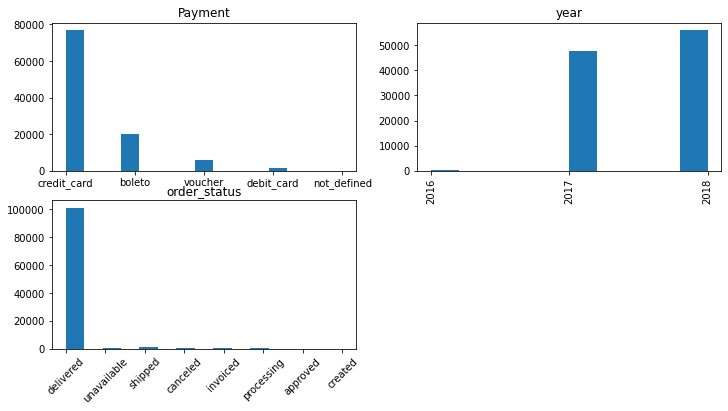

In [13]:
# Distribuição das payment.
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.hist(df['payment_type'], bins = 15)
plt.title('Payment')

plt.subplot(2,2,2)
plt.hist(df['year'])
plt.title('year')
plt.xticks(np.arange(min(df['year']), max(df['year'])+1, 1.0))
plt.xticks(rotation=90)


plt.subplot(2,2,3)
plt.hist(df['order_status'], bins = 15)
plt.title('order_status')
plt.xticks(rotation=45)


In [14]:
df.head()

,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,year
order_id,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,2017
00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,2017
000229ec398224ef6ca0657da4fc703e,1,credit_card,5,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,2018
00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,2018
00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,2017


In [15]:
#df['payment_type'].count()
df_per_payment = df[['order_purchase_timestamp','payment_type']].sort_values(by='order_purchase_timestamp').reset_index(drop=True)



In [16]:
payment_by_customer_df = pd.merge(df,cust_df,how="right",on="customer_id")
#payment_by_customer_df.info()
#cust_df.info()
#customer_id
payment_per_state_df = payment_by_customer_df.groupby(['customer_id','customer_state'])['payment_value'].sum()
#payment_per_state_df.groupby(['customer_state']).mean()

#print(type(payment_per_state_df))
#print(payment_per_state_df.index)

payment_per_state_df.groupby(['customer_state']).count()

customer_state
AC       81
AL      413
AM      148
AP       68
BA     3380
CE     1336
DF     2140
ES     2033
GO     2020
MA      747
MG    11635
MS      715
MT      907
PA      975
PB      536
PE     1652
PI      495
PR     5045
RJ    12852
RN      485
RO      253
RR       46
RS     5466
SC     3637
SE      350
SP    41746
TO      280
Name: payment_value, dtype: int64

In [17]:
payment_per_state_df.groupby(['customer_state']).mean()

customer_state
AC    242.970617
AL    235.507869
AM    189.527500
AP    239.158824
BA    183.111355
CE    209.801527
DF    167.151556
ES    160.902897
GO    175.022510
MA    204.633414
MG    161.580018
MS    194.647902
MT    206.597464
PA    224.544718
PB    264.291884
PE    197.418820
PI    219.404424
PR    161.455429
RJ    167.582789
RN    212.034247
RO    240.577866
RR    218.796087
RS    163.892256
SC    171.852208
SE    214.989286
SP    144.401242
TO    219.590464
Name: payment_value, dtype: float64

In [18]:
#df.loc[df.payment_type=='credit_card', :].shape[0]-.9
#df.loc[df.payment_type==y, 'payment_type'][-1:].values[0]
#plt.text(df.loc[df.payment_type==y, :].shape[0]-.9, df.loc[df.payment_type==y, 'payment_type'][-1:].values[0], y, fontsize=12, color=mycolors[i])

0
1
2
3
4


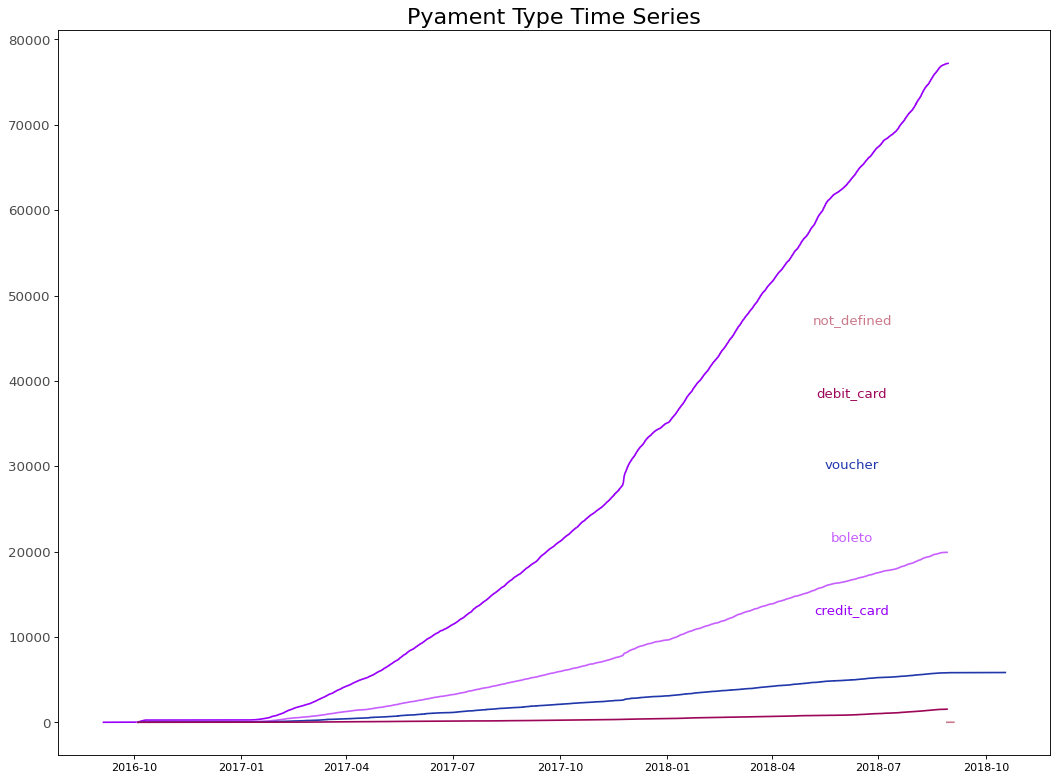

In [19]:
# Prepare data
df['year'] = [d.year for d in df.order_purchase_timestamp]
df['month'] = [d.strftime('%b') for d in df.order_purchase_timestamp]
years = df['year'].unique()

result = df[['payment_type','order_purchase_timestamp']].reset_index(drop=True)

graph = result[result.payment_type=='voucher'].sort_values('order_purchase_timestamp')
graph['count'] = graph.groupby('payment_type').cumcount()

payment_type_list = df['payment_type'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(payment_type_list), replace=False)

# Draw Plot
temp = df[['payment_type','order_purchase_timestamp']].reset_index(drop=True)
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(payment_type_list):
    print(i)
    graph = temp[temp.payment_type==y].sort_values('order_purchase_timestamp')
    graph['count'] = graph.groupby('payment_type').cumcount()    
    plt.plot('order_purchase_timestamp', 'count', data=graph, color=mycolors[i])
    plt.text(0.8, 0.2 + 0.1*i, y, horizontalalignment='center',verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, color=mycolors[i])

# Decoration
plt.yticks(fontsize=12, alpha=.7)
plt.title("Pyament Type Time Series", fontsize=20)
plt.show()

/home/lucas/.local/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/tmp/ipykernel_11443/2530990676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['sales'] = 1
/tmp/ipykernel_11443/2530990676.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

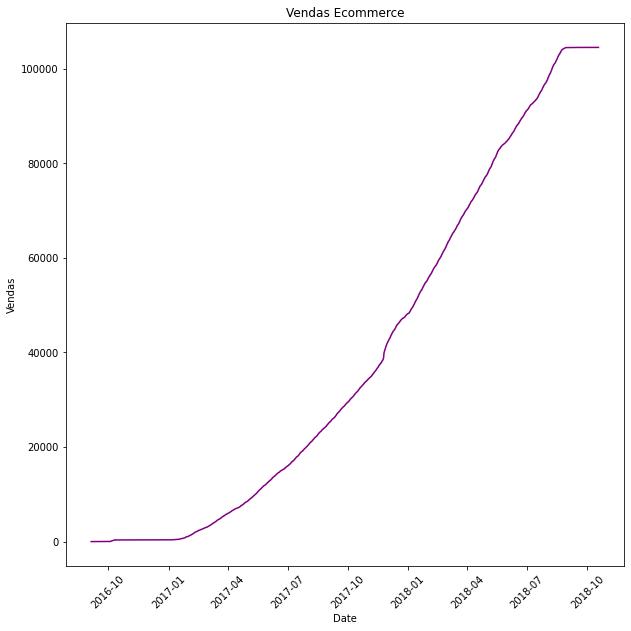

In [20]:
df_sales = df[['order_purchase_timestamp']]

df_sales.sort_values(by=['order_purchase_timestamp'], inplace=True)
#.reset_index(drop=True, inplace=True)
#print(type(df_sales))
df_sales['sales'] = 1
df_sales.set_index('order_purchase_timestamp')

df_sales['c_sum'] = df_sales['sales'].cumsum()

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(df_sales['order_purchase_timestamp'],
        df_sales['c_sum'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Vendas",
       title="Vendas Ecommerce")
plt.xticks(rotation=45)
plt.show()

# Sandbox

In [21]:
#df.reset_index(inplace=True)

# Prepare data
#df['year'] = [d.year for d in df.order_purchase_timestamp]
#df['month'] = [d.strftime('%b') for d in df.order_purchase_timestamp]
#years = df['year'].unique()



#result = df[['payment_type','order_purchase_timestamp']].reset_index(drop=True)
#.groupby(['payment_type','order_purchase_timestamp'])
#print(result[result.payment_type=='credit_card'].groupby('order_purchase_timestamp').cumcount())

#graph = result[result.payment_type=='voucher'].sort_values('order_purchase_timestamp')
#graph['count'] = graph.groupby('payment_type').cumcount()

#print(graph)

#plt.plot('order_purchase_timestamp', 'count', data=graph, color=mycolors[0])
#plt.xticks(rotation=45)
#print(graph)
#.loc[df.payment_type=='credit_card', :].value_counts()

#plt.plot('month', 'sales', color=mycolors[0])

#payment_type_list = df['payment_type'].unique()
#print(type(payment_type_list))
#payment_type_list = np.delete(payment_type_list, [3,4])
#print(payment_type_list)

# Prep Colors
#np.random.seed(100)
#mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(payment_type_list), replace=False)

# Draw Plot
#temp = df[['payment_type','order_purchase_timestamp']].reset_index(drop=True)
#plt.figure(figsize=(16,12), dpi= 80)
#for i, y in enumerate(payment_type_list):
#    print(i)
#    graph = temp[temp.payment_type==y].sort_values('order_purchase_timestamp')
#    graph['count'] = graph.groupby('payment_type').cumcount()
    
#    plt.plot('order_purchase_timestamp', 'count', data=graph, color=mycolors[i])
#    plt.text(0.1, 0.1*i, y, horizontalalignment='center',verticalalignment='center', transform=ax.transAxes, fontsize=12, color=mycolors[i])
    #plt.text(df.loc[df.payment_type==y, :].shape[0]-.9, df.loc[df.payment_type==y, 'payment_type'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration

#datemin = np.datetime64(graph['order_purchase_timestamp'][0], 'Y')
#datemax = np.datetime64(graph['order_purchase_timestamp'][-1], 'Y') + np.timedelta64(1, 'Y')

#plt.gca().set(xlim=(datemin, datemax), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
#plt.yticks(fontsize=12, alpha=.7)
#plt.title("Pyament Type Time Series", fontsize=20)
#plt.show()

#df_sales = df[['order_purchase_timestamp']]

#df_sales.sort_values(by=['order_purchase_timestamp'], inplace=True)
#.reset_index(drop=True, inplace=True)
#print(type(df_sales))
#df_sales['sales'] = 1
#df_sales.set_index('order_purchase_timestamp')

#df_sales['c_sum'] = df_sales['sales'].cumsum()

#df_sales.set_index('order_purchase_timestamp')
#df_sales.reset_index(drop=True, inplace=True)
#df_sales.set_index('order_purchase_timestamp')
#df_sales.info()